<a href="https://colab.research.google.com/github/advikeswaran/siberia-segmentation/blob/main/NewOverlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)


Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive/Rocks/files_for_advik

/content/gdrive/.shortcut-targets-by-id/1M6wTVZliemC1ZzsPT4D8-XFcyxRGrQNb/files_for_advik


In [3]:
!pip install mayavi

In [4]:
!pip install PyQt5

In [3]:
import os
from os import listdir
import numpy as np

dirR = os.listdir("giri_downsampled/625nm")
dirG = os.listdir("giri_downsampled/530nm")
dirB = os.listdir("giri_downsampled/470nm")
dirUV = os.listdir("giri_downsampled/365nm")

In [4]:
#Making arrays of ordered image points, dictionaries of images
rArr = np.empty([len(dirR)], dtype=object)
gArr = np.empty([len(dirG)], dtype=object)
bArr = np.empty([len(dirB)], dtype=object)
uvArr = np.empty([len(dirUV)], dtype=object)

rDict = {}
gDict = {}
bDict = {}
uvDict = {}

#Adding directory image files
for i, image in enumerate(dirR):
  try:
    substr = int(image[10:15])
  except:
    try:
      substr = int(image[9:14])
    except:
      try:
        substr = int(image[8:13])
      except:
        substr = int(image[7:12])
  rArr[i] = substr
  rDict[substr] = [i, image]

for i, image in enumerate(dirG):
  try:
    substr = int(image[10:15])
  except:
    try:
      substr = int(image[9:14])
    except:
      try:
        substr = int(image[8:13])
      except:
        substr = int(image[7:12])
  gArr[i] = substr
  gDict[substr] = [i, image]

for i, image in enumerate(dirB):
  try:
    substr = int(image[10:15])
  except:
    try:
      substr = int(image[9:14])
    except:
      try:
        substr = int(image[8:13])
      except:
        try:
          substr = int(image[7:12])
        except:
          substr = int(image[6:11])
  bArr[i] = substr
  bDict[substr] = [i, image]

for i, image in enumerate(dirUV):
  try:
    substr = int(image[10:15])
  except:
    try:
      substr = int(image[9:14])
    except:
      try:
        substr = int(image[8:13])
      except:
        try:
          substr = int(image[7:12])
        except:
          substr = int(image[6:11])
  uvArr[i] = substr
  uvDict[substr] = [i, image]


# Sorting
rArr = np.sort(rArr, axis=0)
gArr = np.sort(gArr, axis=0)
bArr = np.sort(bArr, axis=0)
uvArr = np.sort(uvArr, axis=0)


for i, img in enumerate(rArr):
  rDict[img][0] = i

for i, img in enumerate(gArr):
  gDict[img][0] = i

for i, img in enumerate(bArr):
  bDict[img][0] = i

for i, img in enumerate(uvArr):
  uvDict[img][0] = i

In [5]:
# Function for rgb image index finding - takes UV range as parameter
def rgbAlign(firstImg, lastImg):
  uvInd1 = uvDict[firstImg][0]
  uvInd2 = uvDict[lastImg][0] + 1
  bInd1 = bDict[firstImg + 1][0]
  bInd2 = bDict[lastImg + 1][0] + 1
  gInd1 = gDict[firstImg + 2][0]
  gInd2 = gDict[lastImg + 2][0] + 1
  rInd1 = rDict[firstImg + 3][0]
  rInd2 = rDict[lastImg + 3][0] + 1

  uvInds = np.arange(uvInd1, uvInd2, 1)
  bInds = np.arange(bInd1, bInd2, 1)
  gInds = np.arange(gInd1, gInd2, 1)
  rInds = np.arange(rInd1, rInd2, 1)

  return rInds, gInds, bInds, uvInds

In [6]:
## Specimen 1

dir1Pyr = os.listdir("siberia_binaries/spec1_pyrite")

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr1Pyr = np.empty([len(dir1Pyr), 5], dtype=object)

# UV range parameter
inds1Pyr = rgbAlign(39876, 41437)

for image in dir1Pyr:
  substr = int(image[12:15]) - 1
  arr1Pyr[substr, 0] = image
  arr1Pyr[substr, 1] = rDict[rArr[inds1Pyr[0][substr]]][1]
  arr1Pyr[substr, 2] = gDict[gArr[inds1Pyr[1][substr]]][1]
  arr1Pyr[substr, 3] = bDict[bArr[inds1Pyr[2][substr]]][1]
  arr1Pyr[substr, 4] = uvDict[uvArr[inds1Pyr[3][substr]]][1]

print(arr1Pyr)

[['spec1_pyrite001.tiff' 'cap260648_39879.jpg' 'cap260591_39878.jpg'
  'cap260534_39877.jpg' 'cap260477_39876.jpg']
 ['spec1_pyrite002.tiff' 'cap260933_39884.jpg' 'cap260876_39883.jpg'
  'cap260819_39882.jpg' 'cap260762_39881.jpg']
 ['spec1_pyrite003.tiff' 'cap261218_39889.jpg' 'cap261161_39888.jpg'
  'cap261104_39887.jpg' 'cap261047_39886.jpg']
 ...
 ['spec1_pyrite310.tiff' 'cap87140_41430.jpg' 'cap87083_41429.jpg'
  'cap87026_41428.jpg' 'cap86969_41427.jpg']
 ['spec1_pyrite311.tiff' 'cap87425_41435.jpg' 'cap87368_41434.jpg'
  'cap87311_41433.jpg' 'cap87254_41432.jpg']
 ['spec1_pyrite312.tiff' 'cap87710_41440.jpg' 'cap87653_41439.jpg'
  'cap87596_41438.jpg' 'cap87539_41437.jpg']]


In [7]:
import matplotlib.pyplot as plt
from skimage.util import img_as_float
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean

#plt.imshow(img_as_float(io.imread("siberia_binaries/spec1_pyrite/spec1_pyrite050.tiff")))

#plt.imshow()


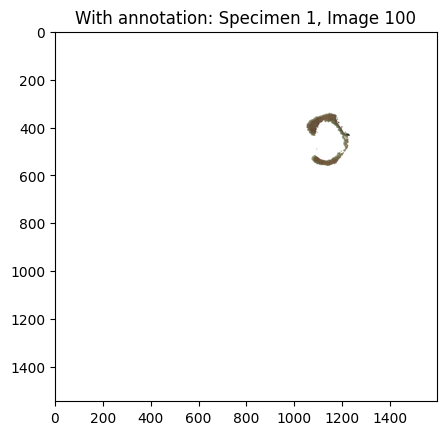

In [16]:
imgPyr1 = img_as_float(io.imread("siberia_binaries/spec1_pyrite/" + arr1Pyr[100, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
pyr1Template = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr1Pyr[100, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr1Pyr[100, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr1Pyr[100, 3]))

x1 = 4564
x2 = 7619
y1 = 0
y2 = 3549

pyr1Template[y1:y2, x1:x2] = imgPyr1

pyr1Template = resize(pyr1Template, (1544, 1595))
pyr1Template = np.ma.masked_where(pyr1Template==0.0, pyr1Template)
pyr1Template[pyr1Template != 0.0] = 1.0


plt.imshow(rgbTemplate, alpha=0.85)
plt.imshow(pyr1Template, cmap='tab10')
plt.title("With annotation: Specimen 1, Image 100")
plt.show()

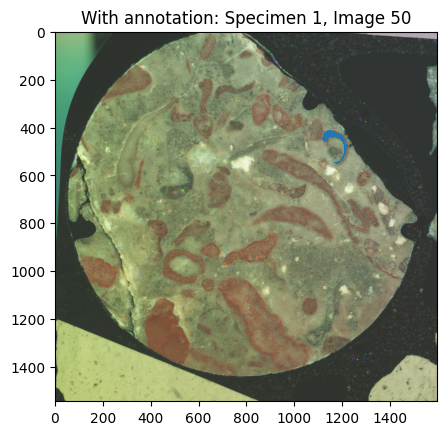

In [77]:
imgPyr1 = img_as_float(io.imread("siberia_binaries/spec1_pyrite/" + arr1Pyr[50, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
pyr1Template = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr1Pyr[50, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr1Pyr[50, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr1Pyr[50, 3]))

x1 = 4564
x2 = 7619
y1 = 0
y2 = 3549

pyr1Template[y1:y2, x1:x2] = imgPyr1

pyr1Template = resize(pyr1Template, (1544, 1595))
pyr1Template = np.ma.masked_where(pyr1Template==0.0, pyr1Template)
pyr1Template[pyr1Template != 0.0] = 1.0

plt.imshow(rgbTemplate, alpha=0.85)
plt.imshow(pyr1Template, cmap='tab10')
plt.title("With annotation: Specimen 1, Image 50")
plt.show()

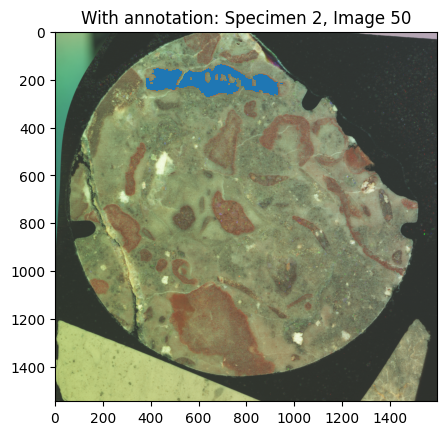

In [15]:
## Specimen 2

dir2 = os.listdir("siberia_binaries/spec2")

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)

# UV range parameter
inds2 = rgbAlign(40097, 41647)

for image in dir2:
  substr = int(image[5:8]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread("siberia_binaries/spec2/" + arr2[50, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[50, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[50, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[50, 3]))

x1 = 1324
x2 = 5516
y1 = 0
y2 = 3409

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2 = np.ma.masked_where(template2==0.0, template2)
template2[template2 != 0.0] = 1.0

plt.imshow(rgbTemplate, alpha=0.85)
plt.imshow(template2, cmap='tab10')
plt.title("With annotation: Specimen 2, Image 50")
plt.show()


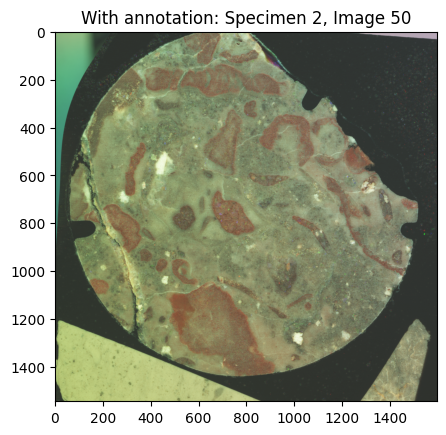

In [17]:
plt.imshow(rgbTemplate, alpha=0.85)
plt.title("With annotation: Specimen 2, Image 50")
plt.show()

In [8]:
!pip install mpl-scatter-density

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.5/655.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.9 MB/s eta 0:00:00


In [15]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

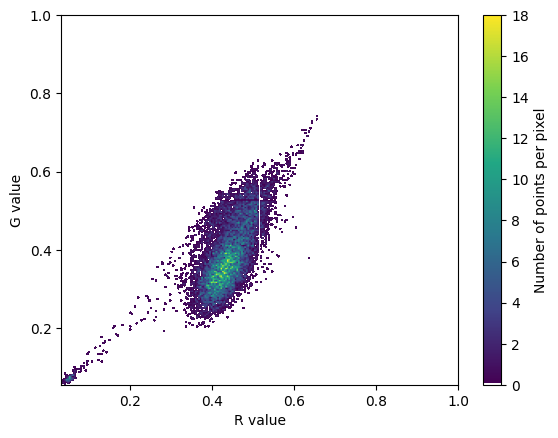

In [19]:
from scipy.stats import gaussian_kde

imgNum = 100

imgPyr1 = img_as_float(io.imread("siberia_binaries/spec1_pyrite/" + arr1Pyr[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
pyr1Template = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr1Pyr[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr1Pyr[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr1Pyr[imgNum, 3]))

x1 = 4564
x2 = 7619
y1 = 0
y2 = 3549

pyr1Template[y1:y2, x1:x2] = imgPyr1

pyr1Template = resize(pyr1Template, (1544, 1595))
#pyr1Template = np.ma.masked_where(pyr1Template==0.0, pyr1Template)
pyr1Template[pyr1Template != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][pyr1Template == 0.0] = 1.0
rgbTemplate[:, :, 1][pyr1Template == 0.0] = 1.0
rgbTemplate[:, :, 2][pyr1Template == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)

#plt.figure(figsize=(15,15))

fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
plt.show()


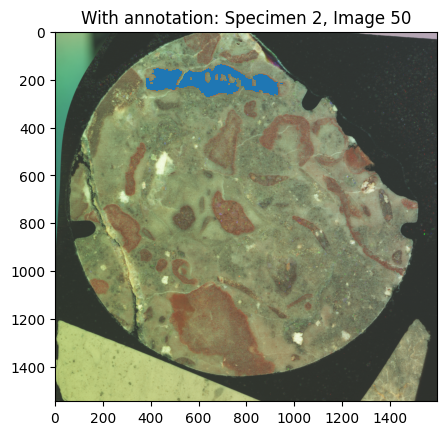

In [23]:
## Specimen 2

dir2 = os.listdir("siberia_binaries/spec2")

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)

# UV range parameter
inds2 = rgbAlign(40097, 41647)

for image in dir2:
  substr = int(image[5:8]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread("siberia_binaries/spec2/" + arr2[50, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[50, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[50, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[50, 3]))

x1 = 1324
x2 = 5516
y1 = 0
y2 = 3409

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2 = np.ma.masked_where(template2==0.0, template2)
template2[template2 != 0.0] = 1.0

plt.imshow(rgbTemplate, alpha=0.85)
plt.imshow(template2, cmap='tab10')
plt.title("With annotation: Specimen 2, Image 50")
plt.show()


Text(0, 0.5, 'G value')

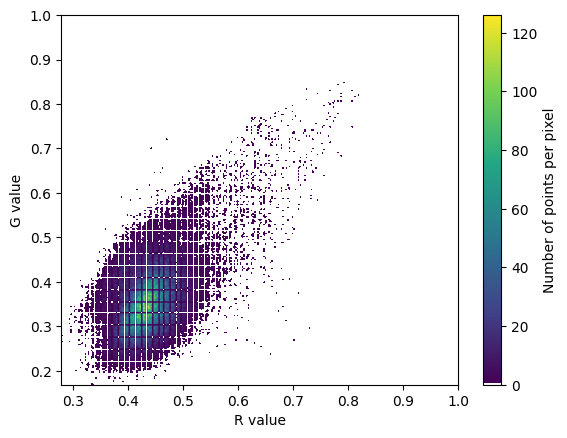

In [31]:
## Specimen 2

dir2Str = "siberia_binaries/spec2/"
dir2 = os.listdir(dir2Str)
imgNum = 100
x1 = 1324
x2 = 5516
y1 = 0
y2 = 3409

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)

# UV range parameter
inds2 = rgbAlign(40097, 41647)

for image in dir2:
  substr = int(image[5:8]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
#plt.show()


Text(0, 0.5, 'G value')

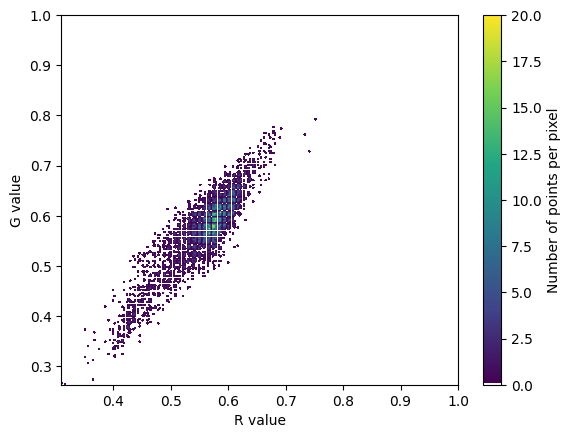

In [42]:
## Specimen 1 Carbonate

dir2Str = "siberia_binaries/spec1_carbonate/"
dir2 = os.listdir(dir2Str)
imgNum = 70
x1 = 4564
x2 = 7619
y1 = 0
y2 = 3549
z1 = 39876
z2 = 41437

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)

# UV range parameter
inds2 = rgbAlign(z1, z2)

for image in dir2:
  substr = int(image[15:18]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
#plt.show()


Text(0, 0.5, 'G value')

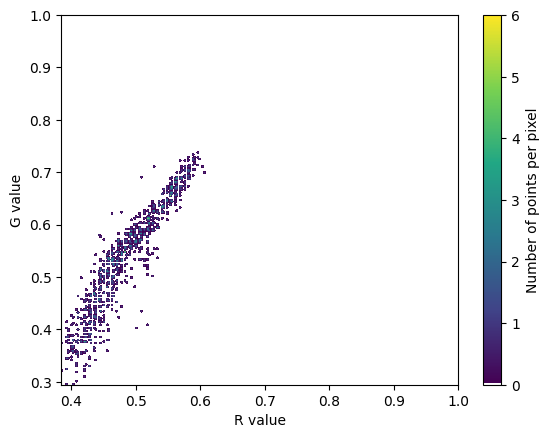

In [48]:
## Specimen 2 Carbonate Caps

dir2Str = "siberia_binaries/spec2_carbonate_caps/"
dir2 = os.listdir(dir2Str)
imgNum = 300
x1 = 1324
x2 = 5516
y1 = 0
y2 = 3409
z1 = 40097
z2 = 41647

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)

# UV range parameter
inds2 = rgbAlign(z1, z2)

for image in dir2:
  substr = int(image[20:23]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
#plt.show()


In [53]:
## Specimen 2 UV Neg Space

dir2Str = "siberia_binaries/spec2_uv_neg_space/"
dir2 = os.listdir(dir2Str)
imgNum = 100
x1 = 1324
x2 = 5516
y1 = 0
y2 = 3409
z1 = 40097
z2 = 41647

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)

# UV range parameter
inds2 = rgbAlign(z1, z2)

for image in dir2:
  substr = int(image[18:21]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
#plt.show()


IndexError: ignored

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'G value')

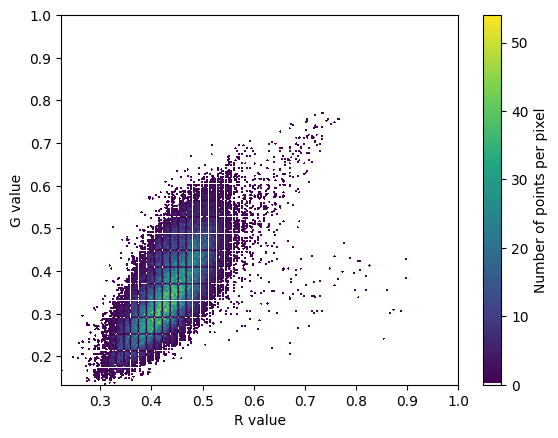

In [56]:
## Specimen 3 Pyrite

dir2Str = "siberia_binaries/spec3_pyrite/"
dir2 = os.listdir(dir2Str)
imgNum = 25
x1 = 0
x2 = 4192
y1 = 0
y2 = 3736
z1 = 34751
z2 = 35316

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)

# UV range parameter
inds2 = rgbAlign(z1, z2)

for image in dir2:
  substr = int(image[12:15]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
#plt.show()


Text(0, 0.5, 'G value')

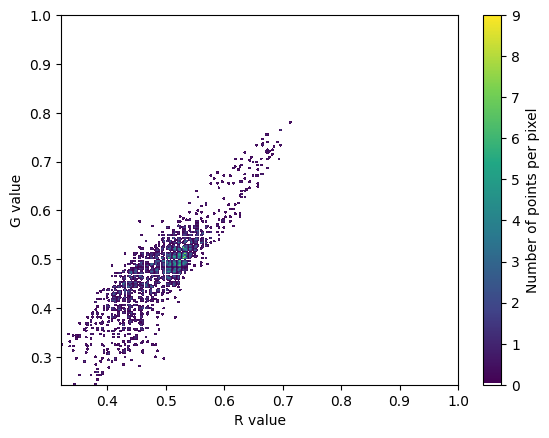

In [58]:
## Specimen 4 Carbonate Caps

dir2Str = "siberia_binaries/spec4_carbonate_caps/"
dir2 = os.listdir(dir2Str)
imgNum = 155
x1 = 888
x2 = 4067
y1 = 3922
y2 = 7285
z1 = 35131
z2 = 36436

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)

# UV range parameter
inds2 = rgbAlign(z1, z2)

for image in dir2:
  substr = int(image[20:23]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
#plt.show()


Text(0, 0.5, 'G value')

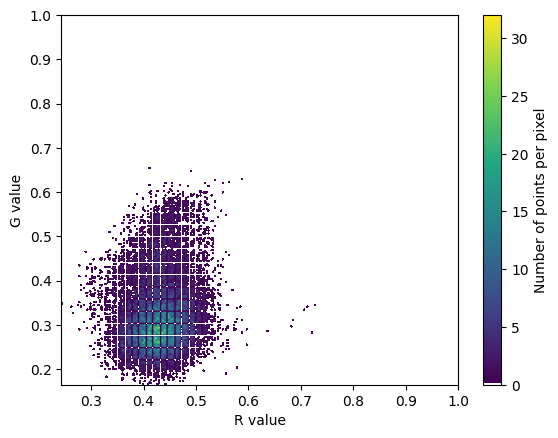

In [62]:
## Specimen 5

dir2Str = "siberia_binaries/spec5/"
dir2 = os.listdir(dir2Str)
imgNum = 150
x1 = 1168
x2 = 4269
y1 = 3268
y2 = 6164
z1 = 39251
z2 = 40467

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)

# UV range parameter
inds2 = rgbAlign(z1, z2)

for image in dir2:
  substr = int(image[5:8]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
#plt.show()


Text(0, 0.5, 'G value')

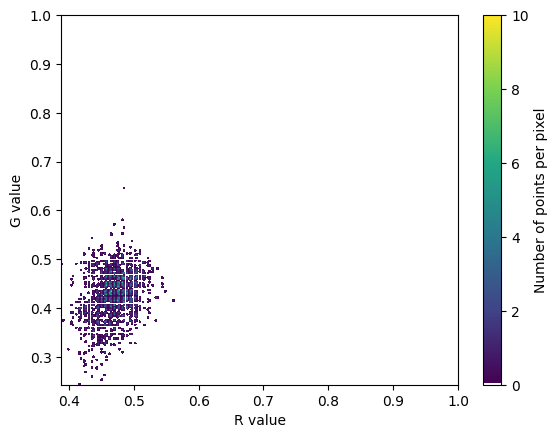

In [66]:
## Specimen 5 Calcite

dir2Str = "siberia_binaries/spec5_calcite/"
dir2 = os.listdir(dir2Str)
imgNum = 194
x1 = 1168
x2 = 4269
y1 = 3268
y2 = 6164
z1 = 39251
z2 = 40467

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)

# UV range parameter
inds2 = rgbAlign(z1, z2)

for image in dir2:
  substr = int(image[13:16]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
#plt.show()


(204, 5)


Text(0, 0.5, 'G value')

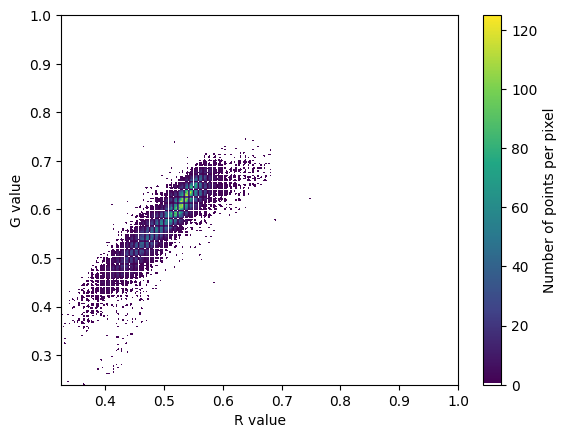

In [86]:
## Specimen 8

dir2Str = "siberia_binaries/spec8/"
dir2 = os.listdir(dir2Str)
imgNum = 100
y1 = 1447
y2 = 5215
x1 = 2523
x2 = 4955
z1 = 41817
z2 = 42843

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)
print(arr2.shape)

# UV range parameter
inds2 = rgbAlign(z1, z2)

for image in dir2:
  substr = int(image[5:8]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
#plt.show()


(180, 5)


/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


Text(0, 0.5, 'G value')

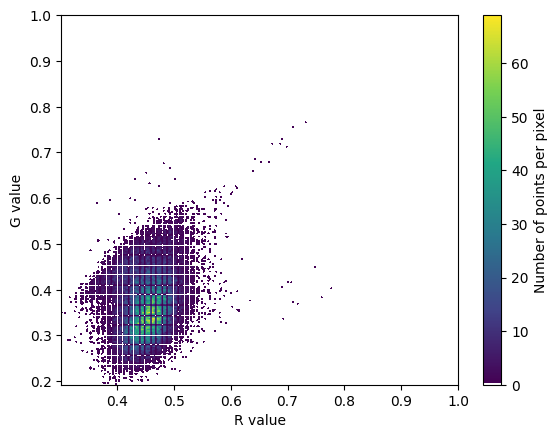

In [95]:
## Specimen 9 UV Internals

dir2Str = "siberia_binaries/spec9_uv_internals/"
dir2 = os.listdir(dir2Str)
imgNum = 100
x1 = 4923
x2 = 7292
y1 = 2023
y2 = 4343
z1 = 41062
z2 = 41957

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)
print(arr2.shape)

# UV range parameter
inds2 = rgbAlign(z1, z2)

for image in dir2:
  substr = int(image[18:21]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
#plt.show()


(222, 5)


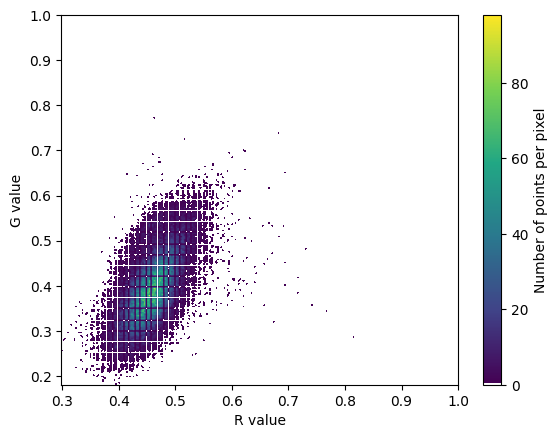

In [99]:
## Specimen 12 UV Internals

dir2Str = "siberia_binaries/spec12_uv_internals/"
dir2 = os.listdir(dir2Str)
imgNum = 150
x1 = 2009
x2 = 6123
y1 = 653
y2 = 3456
z1 = 41967
z2 = 43083

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)
print(arr2.shape)

# UV range parameter
inds2 = rgbAlign(z1, z2)

for image in dir2:
  substr = int(image[19:22]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
plt.show()


(195, 5)


Text(0, 0.5, 'G value')

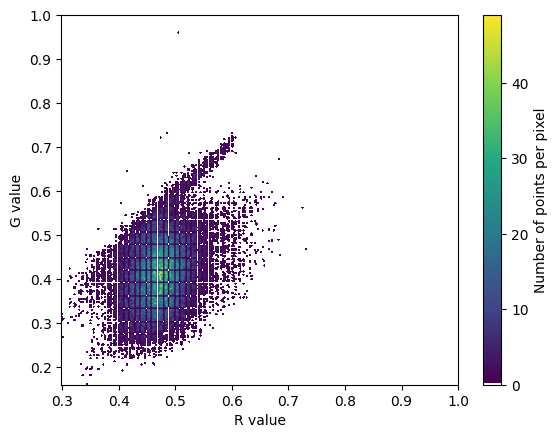

In [103]:
## Specimen 10 All UV

dir2Str = "siberia_binaries/spec10_all_uv/"
dir2 = os.listdir(dir2Str)
imgNum = 100
x1 = 3754
x2 = 6233
y1 = 1229
y2 = 4125
z1 = 40762
z2 = 41732

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)
print(arr2.shape)

# UV range parameter
inds2 = rgbAlign(z1, z2)

for image in dir2:
  substr = int(image[13:16]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
#plt.show()


(173, 5)


Text(0, 0.5, 'G value')

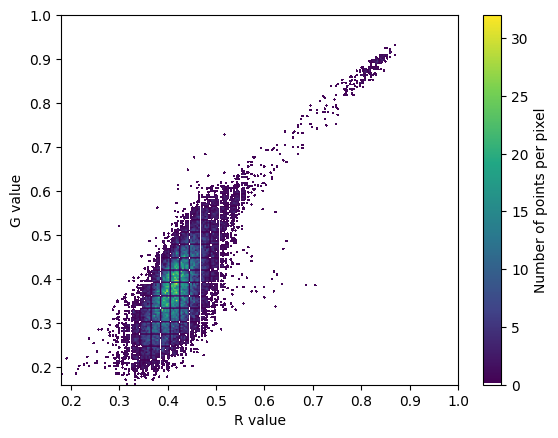

In [105]:
## Specimen 11 All UV

dir2Str = "siberia_binaries/spec11_all_uv/"
dir2 = os.listdir(dir2Str)
imgNum = 100
x1 = 1511
x2 = 4799
y1 = 3735
y2 = 6600
z1 = 34116
z2 = 34976

# 0 = annotation, 1 = R, 2 = G, 3 = B, 4 = UV
arr2 = np.empty([len(dir2), 5], dtype=object)
print(arr2.shape)

# UV range parameter
inds2 = rgbAlign(z1, z2)

for image in dir2:
  substr = int(image[13:16]) - 1
  arr2[substr, 0] = image
  arr2[substr, 1] = rDict[rArr[inds2[0][substr]]][1]
  arr2[substr, 2] = gDict[gArr[inds2[1][substr]]][1]
  arr2[substr, 3] = bDict[bArr[inds2[2][substr]]][1]
  arr2[substr, 4] = uvDict[uvArr[inds2[3][substr]]][1]

img2 = img_as_float(io.imread(dir2Str + arr2[imgNum, 0]))

rgbTemplate = np.empty([1544, 1595, 3])
template2 = np.empty([7762, 8019])

rgbTemplate[:, :, 0] = img_as_float(io.imread("giri_downsampled/625nm/" + arr2[imgNum, 1]))
rgbTemplate[:, :, 1] = img_as_float(io.imread("giri_downsampled/530nm/" + arr2[imgNum, 2]))
rgbTemplate[:, :, 2] = img_as_float(io.imread("giri_downsampled/470nm/" + arr2[imgNum, 3]))

template2[y1:y2, x1:x2] = img2

template2 = resize(template2, (1544, 1595))
template2[template2 != 0.0] = 1.0
#rgbTemplate = np.ma.masked_where(pyr1Template==0.0, rgbTemplate[:, :, 0])

rgbTemplate[:, :, 0][template2 == 0.0] = 1.0
rgbTemplate[:, :, 1][template2 == 0.0] = 1.0
rgbTemplate[:, :, 2][template2 == 0.0] = 1.0

#plt.figure(figsize=(20,20))
#plt.imshow(rgbTemplate)


fig = plt.figure()
using_mpl_scatter_density(fig, rgbTemplate[:, :, 0], rgbTemplate[:, :, 1])
plt.xlabel("R value")
plt.ylabel("G value")
#plt.show()
